### Decision Tree Regression (회귀 트리)
- 결정 트리와 결정 트리 기반의 앙상블 알고리즘은 분류뿐 아니라 회귀분석도 가능하다.
- 분류와 유사하게 분할하며, 최종 분할 후 각 분할 영역에서 실제 데이터까지의 거리들의 평균 값으로 학습 및 예측을 수행한다.

<img src='./images/decision_tree_regression01.png' width='600px' style='margin-left: 20px'>

- 회귀 트리 역시 복잡한 트리 구조를 가질 경우 과적합의 위험이 있고, 트리 크기와 노드의 개수 제한등으로 개선해야 한다.

<img src='./images/decision_tree_regression02.png' width='600px' style='margin-left: 20px'>

- 독립 변수들과 종속 변수 사이의 관계가 상당히 비선형일 경우 사용하는 것이 좋다.

<img src='./images/decision_tree_regression03.png' width='800px' style='margin-left: 20px'>

In [45]:
import pandas as pd

c_df = pd.read_csv('./datasets/korea_cow.csv', encoding='EUC-KR')
c_df

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
0,2021.07.23,4,서*호,48928970,암,550.0,3.0,580,360,363,낙찰,목.배밑혹,큰소,경상남도고성
1,2021.07.23,5,이*락,102112702,암,744.0,2.0,460,320,353,낙찰,NaN,큰소,경상남도고성
2,2021.07.23,7,문*종,156144852,암,1263.0,4.0,340,400,471,낙찰,목이모색 상처,큰소,경상남도고성
3,2021.07.23,8,문*종,136983661,암,1159.0,2.0,380,400,432,낙찰,뒷다리약간절음,큰소,경상남도고성
4,2021.07.23,9,이*만,138655532,암,1124.0,6.0,550,650,766,낙찰,NaN,큰소,경상남도고성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,2021.06.22,320,윤*식,157190517,암,0.0,1.0,0,390,0,유찰,NaN,혈통우,전라남도 함평
19977,2021.06.22,321,윤*식,154652064,암,0.0,1.0,0,430,0,유찰,NaN,혈통우,전라남도 함평
19978,2021.06.22,322,윤*식,156278395,암,0.0,1.0,0,450,0,유찰,NaN,혈통우,전라남도 함평
19979,2021.06.22,323,윤*식,155232402,암,0.0,1.0,0,460,530,낙찰,정영기 -> 박손엽,혈통우,전라남도 함평


In [46]:
c_df.isna().sum()

일자          0
번호          0
출하주        34
개체번호        0
성별          1
kpn        10
계대         10
중량          0
최저가         0
낙찰가         0
상태          0
비고      12319
종류          0
지역          0
dtype: int64

In [47]:
columns = ['성별','중량','상태','종류','낙찰가']
pre_c_df = c_df.loc[:, columns]
pre_c_df

,성별,중량,상태,종류,낙찰가
0,암,580,낙찰,큰소,363
1,암,460,낙찰,큰소,353
2,암,340,낙찰,큰소,471
3,암,380,낙찰,큰소,432
4,암,550,낙찰,큰소,766
...,...,...,...,...,...
19976,암,0,유찰,혈통우,0
19977,암,0,유찰,혈통우,0
19978,암,0,유찰,혈통우,0
19979,암,0,낙찰,혈통우,530


In [48]:
pre_c_df.상태.value_counts()

상태
낙찰    17343
대기     1621
유찰     1016
보류        1
Name: count, dtype: int64

In [49]:
pre_c_df = pre_c_df[pre_c_df.상태 == '낙찰']
pre_c_df

,성별,중량,상태,종류,낙찰가
0,암,580,낙찰,큰소,363
1,암,460,낙찰,큰소,353
2,암,340,낙찰,큰소,471
3,암,380,낙찰,큰소,432
4,암,550,낙찰,큰소,766
...,...,...,...,...,...
19973,암,0,낙찰,혈통우,460
19974,암,0,낙찰,혈통우,451
19975,암,0,낙찰,혈통우,480
19979,암,0,낙찰,혈통우,530


In [50]:
pre_c_df.성별.value_counts()

성별
수     9789
암     7426
거세     117
프       10
Name: count, dtype: int64

In [51]:
pre_c_df = pre_c_df[pre_c_df.성별.isin(['수', '암'])]
pre_c_df

,성별,중량,상태,종류,낙찰가
0,암,580,낙찰,큰소,363
1,암,460,낙찰,큰소,353
2,암,340,낙찰,큰소,471
3,암,380,낙찰,큰소,432
4,암,550,낙찰,큰소,766
...,...,...,...,...,...
19973,암,0,낙찰,혈통우,460
19974,암,0,낙찰,혈통우,451
19975,암,0,낙찰,혈통우,480
19979,암,0,낙찰,혈통우,530


In [52]:
male_cow = pre_c_df[pre_c_df.성별 == '수'].sample(7426, random_state=124)
female_cow = pre_c_df[pre_c_df.성별 == '암']
pre_c_df = pd.concat([male_cow, female_cow])
pre_c_df

,성별,중량,상태,종류,낙찰가
10679,수,0,낙찰,혈통우,291
17948,수,0,낙찰,혈통우,459
13777,수,200,낙찰,혈통우,289
1691,수,0,낙찰,큰소,556
9690,수,0,낙찰,혈통우,519
...,...,...,...,...,...
19973,암,0,낙찰,혈통우,460
19974,암,0,낙찰,혈통우,451
19975,암,0,낙찰,혈통우,480
19979,암,0,낙찰,혈통우,530


In [53]:
pre_c_df.중량.value_counts()

중량
0      8528
250     526
240     506
1       457
230     423
       ... 
110       1
790       1
248       1
285       1
205       1
Name: count, Length: 132, dtype: int64

In [54]:
pre_c_df= pre_c_df.drop(labels=['중량'], axis=1)
pre_c_df

,성별,상태,종류,낙찰가
10679,수,낙찰,혈통우,291
17948,수,낙찰,혈통우,459
13777,수,낙찰,혈통우,289
1691,수,낙찰,큰소,556
9690,수,낙찰,혈통우,519
...,...,...,...,...
19973,암,낙찰,혈통우,460
19974,암,낙찰,혈통우,451
19975,암,낙찰,혈통우,480
19979,암,낙찰,혈통우,530


In [55]:
pre_c_df= pre_c_df.drop(labels=['상태'], axis=1)
pre_c_df

,성별,종류,낙찰가
10679,수,혈통우,291
17948,수,혈통우,459
13777,수,혈통우,289
1691,수,큰소,556
9690,수,혈통우,519
...,...,...,...
19973,암,혈통우,460
19974,암,혈통우,451
19975,암,혈통우,480
19979,암,혈통우,530


In [56]:
pre_c_df= pre_c_df.reset_index(drop=True)
pre_c_df

,성별,종류,낙찰가
0,수,혈통우,291
1,수,혈통우,459
2,수,혈통우,289
3,수,큰소,556
4,수,혈통우,519
...,...,...,...
14847,암,혈통우,460
14848,암,혈통우,451
14849,암,혈통우,480
14850,암,혈통우,530


In [57]:
pre_c_df.종류.value_counts()

종류
혈통우    10329
큰소      4523
Name: count, dtype: int64

In [58]:
super_cow = pre_c_df[pre_c_df.종류 == '혈통우'].sample(4523, random_state=124)
big_cow = pre_c_df[pre_c_df.종류 == '큰소']
pd.concat([super_cow, big_cow]).성별.value_counts()

성별
암    5454
수    3592
Name: count, dtype: int64

In [59]:
pre_c_df = pd.concat([super_cow, big_cow]).reset_index(drop=True)
pre_c_df

,성별,종류,낙찰가
0,수,혈통우,336
1,수,혈통우,549
2,암,혈통우,428
3,수,혈통우,376
4,수,혈통우,579
...,...,...,...
9041,암,큰소,856
9042,암,큰소,520
9043,암,큰소,907
9044,암,큰소,927


In [60]:
from sklearn.preprocessing import LabelEncoder

columns = ['성별', '종류']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_c_df[column])
    encoders[column] = encoder.classes_
    pre_c_df[column] = result

print(encoders)

{'성별': array(['수', '암'], dtype=object), '종류': array(['큰소', '혈통우'], dtype=object)}


In [61]:
pre_c_df

,성별,종류,낙찰가
0,0,1,336
1,0,1,549
2,1,1,428
3,0,1,376
4,0,1,579
...,...,...,...
9041,1,0,856
9042,1,0,520
9043,1,0,907
9044,1,0,927


In [62]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    낙찰가   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                          1.294e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:06:56   Log-Likelihood:                         -63376.
No. Observations:                9046   AIC:                                  1.268e+05
Df Residuals:                    9044   BIC:                                  1.268e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [64]:
get_vif(features)

,vif_score,feature
0,1.112592,성별
1,1.112592,종류


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)

In [66]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2_Score = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
           .format(MSE, RMSE, MSLE, RMSLE, R2_Score))

In [67]:
get_evaluation(y_test, prediction)

MSE: 14652.4119, RMSE: 121.0471, MSLE: 0.0598, RMSLE: 0.2446, R2: 0.1748


<Axes: >

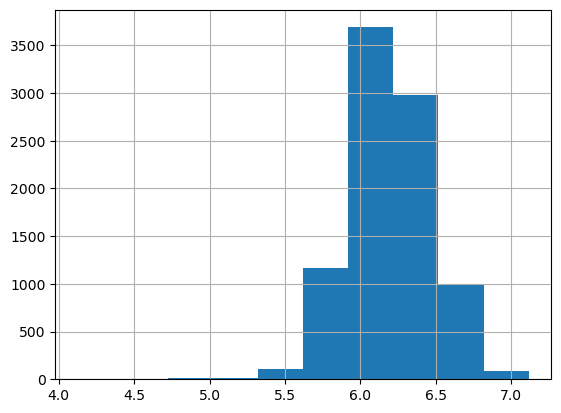

In [44]:
np.log1p(pre_c_df.낙찰가).hist()

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [69]:
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)

MSE: 13363.6021, RMSE: 115.6010, MSLE: 0.0550, RMSLE: 0.2345, R2: 0.2474


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 13363.6021, RMSE: 115.6010, MSLE: 0.0550, RMSLE: 0.2345, R2: 0.2474
RandomForestRegressor
MSE: 13363.0958, RMSE: 115.5989, MSLE: 0.0550, RMSLE: 0.2345, R2: 0.2474
GradientBoostingRegressor
MSE: 13363.5861, RMSE: 115.6010, MSLE: 0.0550, RMSLE: 0.2345, R2: 0.2474
XGBRegressor
MSE: 13363.6015, RMSE: 115.6010, MSLE: 0.0550, RMSLE: 0.2345, R2: 0.2474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4
[LightGBM] [Info] Number of data points in the train set: 7236, number of used features: 2
[LightGBM] [Info] Start training from score 506.928552
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12, 20], 'min_samples_split': [20, 30, 40, 50, 60],
              'n_estimators': [10, 50, 100, 500, 1000]}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [4, 8, 12, 20],
                         'min_samples_split': [20, 30, 40, 50, 60],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [72]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-14287.093798,41
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-14287.315091,81
2,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-14287.049906,21
3,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-14286.995957,1
4,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",-14287.142539,61
...,...,...,...
95,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",-14287.093798,41
96,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",-14287.315091,81
97,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",-14287.049906,21
98,"{'max_depth': 20, 'min_samples_split': 60, 'n_...",-14286.995957,1


In [73]:
rf_r = grid_rf_r.best_estimator_

In [74]:
prediction = rf_r.predict(X_test)
get_evaluation(y_test.values, prediction)

MSE: 13362.9265, RMSE: 115.5981, MSLE: 0.0550, RMSLE: 0.2345, R2: 0.2474
